# 单变量线性回归

假设要学习的函数为线性函数：y = 2x + 1

In [105]:
# 在 Jupyter 中，使用 matplotlib 显示图像需要设置为 inline 模式，否则不会显示图像
# %matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# 用于显示函数图像的库
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

In [106]:
np.random.seed(5)

## 生成输入数据

构造满足这个函数的 x和y 同时加入一些不满足方程的噪声。

In [107]:
# 通过使用 numpy 生成等差数列的方法生成100个点，每个点取值在（-1，+1）之间。
x_data = np.linspace(-1, 1, 100)

# y = 2x + 1 + 噪声
# 其中，噪声的维度与 x_data 一致
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

In [108]:
# np.random.randn(d0, d1, ... , dn)是从标准正态分布中返回一个或多个样本值
# 标准正态分布又称为u分布，是以0为均值，1为标准差的正态分布，记为：N（0，1）
np.random.randn(10)

array([ 0.79242262,  0.17076445, -1.75374086,  0.63029648,  0.49832921,
        1.01813761, -0.84646862,  2.52080763, -1.23238611,  0.72695326])

In [109]:
# x_data.shape 为一个元组，表示 x_data 为一个一维数组，且该数组中有100个元素
x_data.shape

(100,)

In [110]:
# 实参的前面加上 * 和 ** 时，就意味着拆包，单个 * 表示将元组拆成一个个单独的实参
np.random.randn(*x_data.shape)

array([ 0.04595522, -0.48713265,  0.81613236, -0.28143012, -2.33562182,
       -1.16727845,  0.45765807,  2.23796561, -1.4812592 , -0.01694532,
        1.45073354,  0.60687032, -0.37562084, -1.42192455, -1.7811513 ,
       -0.74790579, -0.36840953, -2.24911813, -1.69367504,  0.30364847,
       -0.40899234, -0.75483059, -0.40751917, -0.81262476,  0.92751621,
        1.63995407,  2.07361553,  0.70979786,  0.74715259,  1.46309548,
        1.73844881,  1.46520488,  1.21228341, -0.6346525 , -1.5996985 ,
        0.87715281, -0.09383245, -0.05567103, -0.88942073, -1.30095145,
        1.40216662,  0.46510099, -1.06503262,  0.39042061,  0.30560017,
        0.52184949,  2.23327081, -0.0347021 , -1.27962318,  0.03654264,
       -0.64635659,  0.54856784,  0.21054246,  0.34650175, -0.56705117,
        0.41367881, -0.51025606,  0.51725935, -0.30100513, -1.11840643,
        0.49852362, -0.70609387,  1.4438811 ,  0.44295626,  0.46770521,
        0.10134479, -0.05935198, -2.38669774,  1.22217056, -0.81

In [111]:
# 本例中，np.random.randn(*x_data.shape) 与 np.random.randn(100) 功能相同
np.random.randn(100)

array([-1.02957349, -1.33628031, -0.61056736,  0.52469426, -0.34930813,
       -0.44073846, -1.1212876 ,  1.47284473, -0.62337224, -1.08070195,
       -0.12253009, -0.8077431 , -0.23255622,  1.33515034, -0.44645673,
       -0.04978868, -0.36854478, -0.19173957,  0.81967992,  0.53163372,
       -0.34161504, -0.93090048, -0.13421699,  0.83259361, -0.01735327,
       -0.12765822, -1.80791662,  0.99396898, -1.49112886, -1.28210748,
       -0.37570741,  0.03464388,  0.04507816, -0.76374689, -0.31313851,
       -0.60698954, -1.80955123, -0.25551774, -0.69379935,  0.41919776,
       -0.14520019,  0.9638013 ,  0.69622199,  0.89940546,  1.20837807,
        0.6932537 , -0.16636061,  1.35311311, -0.92862651, -0.03547249,
        0.85964595, -0.28749661,  0.71494995, -0.8034526 , -0.54048196,
        0.54617743,  0.71188926,  1.19715449, -0.07006703,  0.29822712,
        0.62619261,  0.46743206, -1.30262143, -0.57008965,  1.44295001,
       -1.24399513,  0.62888033, -0.42559213,  1.00320956, -0.77

## 利用 matplotlib 画出生成结果

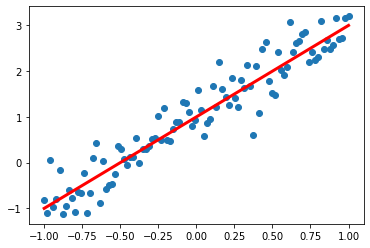

In [112]:
# 绘图

# 画出随机散点图
plt.scatter(x_data, y_data)

# 画出本例中要求的 y = 2x + 1 的图像
plt.plot(x_data, 2 * x_data + 1.0, color="red", linewidth=3)

# help(plt.plot())

## 构建模型

定义 x和y 的占位符

In [113]:
# 定义训练数据的占位符，x为特征值，y为标签值
x = tf.compat.v1.placeholder("float", name="x")
y = tf.compat.v1.placeholder("float", name="y")

构建回归模型

In [114]:
def model(x, w, b):
    return tf.multiply(x, w) + b

创建变量

+ TensorFlow变量的声明函数是：tf.Variable
+ tf.Variable 的作用是保存和更新参数
+ 变量的初始值可以是随机数、常数或是通过其他变量的初始值计算得到的

In [115]:
# 目标函数：y = 2x + 1
# 模型函数：y = (w)x + (b)

# 构建线性函数的斜率，变量w
w = tf.Variable(1.0, name="w0")

# 构建线性函数的截距，变量b
b = tf.Variable(0.0, name="b0")

In [116]:
# pred 为预测值，前向计算
pred = model(x, w, b)

## 训练模型

设置训练参数

In [117]:
# 迭代次数（训练轮数）
train_epochs = 10

# 控制显示 loss 的粒度
display_step = 10

# 学习率
learning_rate = 0.05

关于学习率的设置：

+ 学习率的作用：控制参数更新的幅度
+ 如果学习率设置过大，可能导致参数在极值附近来回摇摆，无法保证收敛
+ 如果学习率设置过小，虽然能保证收敛，但优化速度会大大降低，我们需要更多迭代次数才能达到理想的优化结果

定义损失函数

+ 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
+ 常见损失函数：均方差（Mean Square Error，MSE）和 交叉熵（cross-entropy）

In [118]:
# L2损失函数
# 采用均方差作为损失函数
loss_function = tf.reduce_mean(tf.square(y - pred))

定义优化器

定于优化器 Optimizer，初始化一个 GradientDescentOptimizer

设置学习率和优化目标：最小化损失

In [119]:
# 梯度下降优化器
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

## 迭代训练

In [120]:
# 准备会话窗口与初始化变量
session = tf.compat.v1.Session()

init = tf.compat.v1.global_variables_initializer()

session.run(init)

模型训练阶段，设置迭代轮数，每次通过将样本逐个输入模型，进行梯度下降优化操作

每轮迭代后，绘制出模型曲线

In [121]:
# 开始训练，轮数为：epoch，采用SGD随机梯度下降优化方法
# for epoch in range(train_epochs):
#     for xs, ys in zip(x_data, y_data):
#         loss = session.run([optimizer, loss_function], feed_dict={x: xs, y: ys})
#
#     b0temp = b.eval(session=session)
#     w0temp = w.eval(session=session)
#
#     # 绘图
#     plt.plot(x_data, w0temp * x_data + b0temp)

## 修改训练函数，在训练中显示损失值

Train Epoch:  01 Step: 010 loss=  0.007022
Train Epoch:  01 Step: 020 loss=  0.186608
Train Epoch:  01 Step: 030 loss=  0.024833
Train Epoch:  01 Step: 040 loss=  0.620800
Train Epoch:  01 Step: 050 loss=  0.006301
Train Epoch:  01 Step: 060 loss=  0.023637
Train Epoch:  01 Step: 070 loss=  0.354420
Train Epoch:  01 Step: 080 loss=  0.027937
Train Epoch:  01 Step: 090 loss=  0.029015
Train Epoch:  01 Step: 100 loss=  0.106557
Train Epoch:  02 Step: 110 loss=  0.179423
Train Epoch:  02 Step: 120 loss=  0.067458
Train Epoch:  02 Step: 130 loss=  0.000282
Train Epoch:  02 Step: 140 loss=  0.344066
Train Epoch:  02 Step: 150 loss=  0.021391
Train Epoch:  02 Step: 160 loss=  0.006406
Train Epoch:  02 Step: 170 loss=  0.142011
Train Epoch:  02 Step: 180 loss=  0.000234
Train Epoch:  02 Step: 190 loss=  0.094913
Train Epoch:  02 Step: 200 loss=  0.052371
Train Epoch:  03 Step: 210 loss=  0.044098
Train Epoch:  03 Step: 220 loss=  0.082669
Train Epoch:  03 Step: 230 loss=  0.000455
Train Epoch

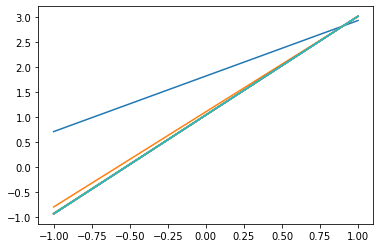

In [122]:
# 记录训练步数
step = 0

# 用于保存loss值的列表
loss_list = []

# 对训练函数进行修改，使其显示损失值
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = session.run([optimizer, loss_function], feed_dict={x: xs, y: ys})

        # 显示损失值 loss
        # display_step: 控制报告的粒度
        # 例如：如果 display_step设为2，则将没训练2个样本输出一次损失值
        # 与超参数不同，修改display_step不会更改模型学习的规律
        loss_list.append(loss)
        step += 1

        if step % display_step == 0:
            print("Train Epoch: ", '%02d' % (epoch + 1), "Step: %03d" % (step), "loss=", "{:9f}".format(loss))

    b0temp = b.eval(session=session)
    w0temp = w.eval(session=session)

    plt.plot(x_data, w0temp * x_data + b0temp)

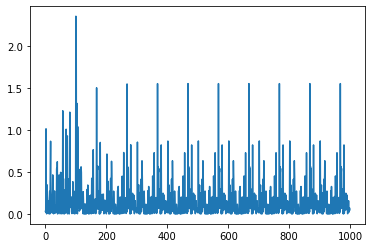

In [123]:
plt.plot(loss_list)

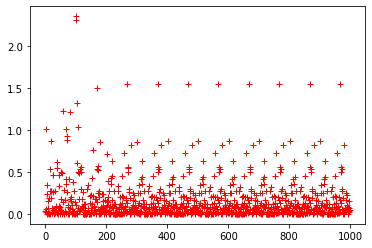

In [124]:
plt.plot(loss_list, "r+")

In [125]:
[x for x in loss_list if x > 1]

[1.0133754,
 1.2284044,
 1.0088208,
 1.2116321,
 2.3539772,
 2.3148305,
 1.3175836,
 1.0387748,
 1.5018207,
 1.547514,
 1.5514,
 1.5517284,
 1.5517554,
 1.551758,
 1.551758,
 1.551758,
 1.551758]

从上图看出，本例拟合模型较为简单，训练3次后已接近收敛

对于复杂模型，需要更多次训练才能收敛

## 查看结果

In [126]:
# w的值应该在2附近
print("w: ", session.run(w))

# b的值应该在1附近
print("b: ", session.run(b))

# 数据每次运行结果会有所不同

w:  1.9822965
b:  1.0420128


## 结果可视化

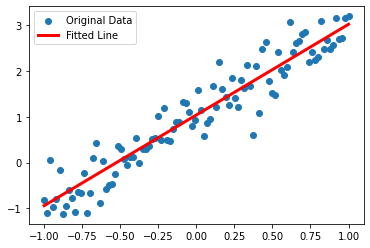

In [127]:
plt.scatter(x_data, y_data, label="Original Data")

plt.plot(x_data, x_data * session.run(w) + session.run(b), label="Fitted Line", color="red", linewidth=3)

# 通过 loc 指定图例位置
plt.legend(loc=2)

## 通过模型进行预测

In [128]:
x_test = 3.21

predict = session.run(pred, feed_dict={x: x_test})
print("预测值: ", predict)

target = 2 * x_test + 1.0
print("目标值: ", target)

预测值:  7.4051843
目标值:  7.42
